##  Introduction

This example is based on [Kaggle](https://www.kaggle.com/javidimail/nuclei-detection-with-opencv) example an give us insights on how to use OpenCV to detect and count elements in Transmission Electron Microscopy images.
The image used here as example was taken from a dataset provided by [Boiko et al. (2020)](https://www.nature.com/articles/s41597-020-0439-1)

### Importing libraries

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
import imageio
import shutil
%matplotlib inline

### Choosing a TEM image from dataset

In [108]:
FILE = 'test2.tif'

### Reading the image and finding appropriate filter settings

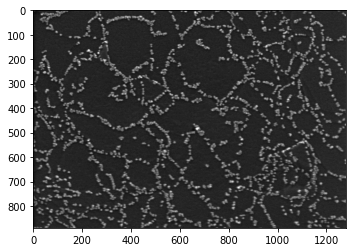

In [109]:
img = cv2.imread(FILE,0)
plt.imshow(img, cmap = 'gray')
plt.show()

In [113]:
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

### Ploting  the filtering process

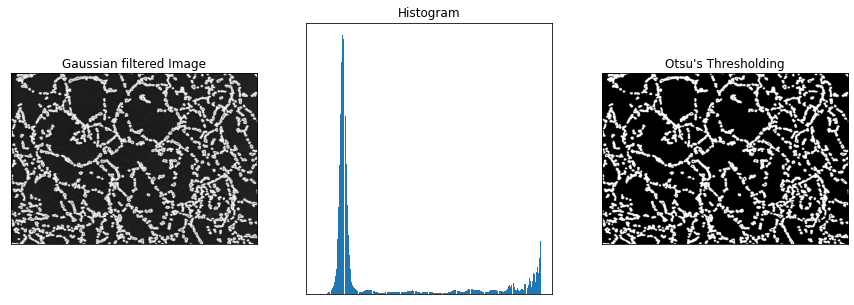

In [114]:
plt.figure(figsize=(15,5))
images = [blur, 0, th3]
titles = ['Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.subplot(1,3,1),plt.imshow(images[0],'gray')
plt.title(titles[0]), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.hist(images[0].ravel(),256)
plt.title(titles[1]), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(images[2],'gray')
plt.title(titles[2]), plt.xticks([]), plt.yticks([])
plt.show()

### Counting the number of contours in the filtered image

number of detected contours:  3349


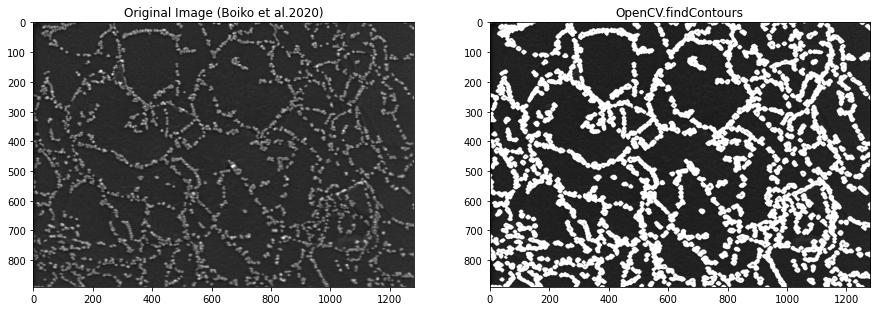

In [115]:
im = cv2.imread(FILE)
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img, contours, -1, (255,255,255), 3)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1),plt.title('Original Image (Boiko et al.2020)'),plt.imshow(im)#,'red')
plt.subplot(1,2,2),plt.title('OpenCV.findContours'),plt.imshow(img,'gray')#,'red')

print('number of detected contours: ',len(contours))

*If you are interested in OpenCV, checkout [OpenCV-Python-Toturials](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)*